In [1]:
#.提取观测数据和验证双星数据
import h5py
import numpy as np
file_path=r"C:\Users\86130\Desktop\LDC2_sangria_training_v2.h5"
def extract_obs_data(file_path):
    obs_data={}
    with h5py.File(file_path,'r') as f:
        obs_tdi=f['obs/tdi'][:]
        if obs_tdi.ndim == 2 and obs_tdi.shape[1] == 1:
            obs_tdi=obs_tdi.flatten()
        obs_data['obs_time']=obs_tdi['t']
        obs_data['obs_X']=obs_tdi['X']
        obs_data['obs_Y']=obs_tdi['Y']
        obs_data['obs_Z']=obs_tdi['Z']
        obs_data['obs_A']=(obs_tdi['Z']-obs_tdi['X'])/np.sqrt(2)
        obs_data['obs_E']=(obs_tdi['X']-2*obs_tdi['Y']+obs_tdi['Z'])/np.sqrt(6)
        obs_data['obs_dt']=obs_tdi['t'][1]-obs_tdi['t'][0]
        N=len(obs_data['obs_time'])
        obs_data['obs_frequency']=np.fft.fftfreq(N,obs_data['obs_dt'])
        obs_data['obs_df']=obs_data['obs_frequency'][1]-obs_data['obs_frequency'][0]
        obs_data['obs_X_f']=np.fft.fft(obs_data['obs_X'])
        obs_data['obs_Y_f']=np.fft.fft(obs_data['obs_Y'])
        obs_data['obs_Z_f']=np.fft.fft(obs_data['obs_Z'])
        obs_data['obs_A_f']=np.fft.fft(obs_data['obs_A'])
        obs_data['obs_E_f']=np.fft.fft(obs_data['obs_E'])
        print(len(obs_data['obs_time']))
    return obs_data

obs_data=extract_obs_data(file_path)
def extract_vgb_data(file_path):
    vgb_data={}
    with h5py.File(file_path,'r') as f:
        vgb_tdi=f['sky/vgb/tdi'][:]
        if vgb_tdi.ndim == 2 and vgb_tdi.shape[1] == 1:
            vgb_tdi=vgb_tdi.flatten()
        vgb_data['vgb_t']=vgb_tdi['t']
        vgb_data['vgb_X']=vgb_tdi['X']
        vgb_data['vgb_Y']=vgb_tdi['Y']
        vgb_data['vgb_Z']=vgb_tdi['Z']
        vgb_data['vgb_A']=(vgb_tdi['Z']-vgb_tdi['X'])/np.sqrt(2)
        vgb_data['vgb_E']=(vgb_tdi['X']-2*vgb_tdi['Y']+vgb_tdi['Z'])/np.sqrt(6)
        vgb_data['vgb_X_f']=np.fft.fft(vgb_data['vgb_X'])
        vgb_data['vgb_Y_f']=np.fft.fft(vgb_data['vgb_Y'])
        vgb_data['vgb_Z_f']=np.fft.fft(vgb_data['vgb_Z'])
        vgb_data['vgb_A_f']=np.fft.fft(vgb_data['vgb_A'])
        vgb_data['vgb_E_f']=np.fft.fft(vgb_data['vgb_E'])

    return vgb_data
vgb_data=extract_vgb_data(file_path)

6307200


In [2]:
#.提取验证双星参数
import pandas as pd
def extract_vgb_parameters(file_path):
    with h5py.File(file_path,'r') as f:
        vgb_cat=f['sky/vgb/cat'][:]
        vgb_cat_flat=vgb_cat.flatten()
        vgb_frame=pd.DataFrame(vgb_cat_flat)
        config={}
        config_group=f['sky/vgb/config']
        for key in config_group.keys():
            config[key]=config_group[key][()]
    return vgb_frame,config
vgb_frame,config=extract_vgb_parameters(file_path)
print(config)
def get_vgb_parameters(vgb_frame,binary_index=0):
    binary_data=vgb_frame.iloc[binary_index]
    binary_parameters={
        'name':binary_data['Name'],
        'amplitude':binary_data['Amplitude'],
        'frequency':binary_data['Frequency'],
        'frequency_derivative':binary_data['FrequencyDerivative'],
        'ecliptic_latitude':binary_data['EclipticLatitude'],
        'ecliptic_longitude':binary_data['EclipticLongitude'],
        'inclination':binary_data['Inclination'],
        'initial_phase':binary_data['InitialPhase'],
        'polarization':binary_data['Polarization'],
        'distance':binary_data['Distance'],
        'mass1':binary_data['Mass1'],
        'mass2':binary_data['Mass2'],
        'drift':binary_data.get('Drift',np.nan),
        'error_distance':binary_data.get('ErrorDistance',np.nan),
        'error_mass1':binary_data.get('ErrorMass1',np.nan),
        'error_mass2':binary_data.get('ErrorMass2',np.nan),
        'galactic_latitude':binary_data.get('GalacticLatitude',np.nan),
        'galactic_longitude':binary_data.get('GalacticLongitude',np.nan),
        'period':binary_data.get('Period',np.nan)
    }
    return binary_parameters

def get_all_vgb_parameters(vgb_frame):
    all_parameters=[]
    for i in range(len(vgb_frame)):
        all_parameters.append(get_vgb_parameters(vgb_frame,i))
    return all_parameters

first_binary_parameters=get_vgb_parameters(vgb_frame,binary_index=7)
all_binaries_params=get_all_vgb_parameters(vgb_frame)
all_params=pd.DataFrame(all_binaries_params)
print(first_binary_parameters)
first_binary_parameters['amplitude']

{'approximant': b'TD_fdot', 'catalogs': b'/data/Params_VGBind_210910.hdf5', 'nsource': np.int64(36), 'seed': np.int64(1234), 'source_type': b'GB'}
{'name': b'ZTFJ1539', 'amplitude': np.float64(9.920753733951951e-23), 'frequency': np.float64(0.004821699107149872), 'frequency_derivative': np.float64(2.5378249511019894e-16), 'ecliptic_latitude': np.float64(1.154738282986135), 'ecliptic_longitude': np.float64(3.5784075522268592), 'inclination': np.float64(1.4686945655532282), 'initial_phase': np.float64(4.830600316082553), 'polarization': np.float64(5.088202331694798), 'distance': np.float64(2340.0), 'mass1': np.float64(0.61), 'mass2': np.float64(0.21), 'drift': np.float64(0.0), 'error_distance': np.float64(140.0), 'error_mass1': np.float64(0.0195), 'error_mass2': np.float64(0.015), 'galactic_latitude': np.float64(0.882819926809479), 'galactic_longitude': np.float64(1.4097828040862033), 'period': np.float64(414.7915404)}


np.float64(9.920753733951951e-23)

In [3]:
#.设置合理的参数值
import numpy as np
from scipy.stats import  uniform
import astropy.units as u
import pandas as pd
class Bayesianprior:
    relative_ranges={
            'mass1':0.3,
            'mass2':0.35,
            'distance':0.4,
            'frequency':0.1,
            'frequency_derivative':1,
            'inclination':0.2,
            'galactic_latitude':0.1,
            'galactic_longitude':0.1,
            'ecliptic_latitude':0.1,
            'ecliptic_longitude':0.1,
            'initial_phase':0.2,
            'polarization':0.2
        }
    absolute_limits={
            'mass1':(0.1,1.7),
            'mass2':(0.01,1.1),
            'distance':(50,20000),
            'frequency':(1e-5,2e-2),
            'frequency_derivative':(-1e-15,1e-15),
            'inclination':(0,np.pi/2),
            'galactic_latitude':(-np.pi/2,np.pi/2),
            'galactic_longitude':(0,2*np.pi),
            'ecliptic_latitude':(-np.pi/2,np.pi/2),
            'ecliptic_longitude':(0,2*np.pi), 
            'initial_phase':(0,2*np.pi),
            'polarization':(0,2*np.pi)
        }
    param_names=['mass1','mass2','distance','frequency','frequency_derivative','inclination','galactic_latitude','galactic_longitude','ecliptic_latitude','ecliptic_longitude','initial_phase','polarization']

    def __init__(self):
        #调用验证双星参数
        self.vgb_frame=vgb_frame
        self.num_systems=len(vgb_frame)
        
    def get_prior_bounds(self,binary_index):

        binary_params=get_vgb_parameters(self.vgb_frame,binary_index)
        bounds={}
        for param_name in self.param_names:
            param_value=binary_params[param_name]
            abs_min,abs_max=self.absolute_limits[param_name]
            relative_range=self.relative_ranges[param_name]
            low_bound=max(abs_min,param_value*(1-relative_range))
            high_bound=min(abs_max,param_value*(1+relative_range))
            bounds[param_name]={
                'low':low_bound,
                'original_value':param_value,
                'high':high_bound,
                'type':uniform,   
            }
        return bounds
    
    def log_prior(params):
        for i,param_value in enumerate(params):
            param_name=param_name[i]
            param_bounds=bounds[param_name]
            low=param_bounds['low']
            high=param_bounds['high']
            if not (low<=param_value<=high):
                return -np.inf
        return 0.0
    
Bayesianprior=Bayesianprior()
bounds=Bayesianprior.get_prior_bounds(binary_index=0)
print(bounds)

{'mass1': {'low': np.float64(0.45149999999999996), 'original_value': np.float64(0.645), 'high': np.float64(0.8385), 'type': <scipy.stats._continuous_distns.uniform_gen object at 0x0000021413D55550>}, 'mass2': {'low': np.float64(0.0442), 'original_value': np.float64(0.068), 'high': np.float64(0.0918), 'type': <scipy.stats._continuous_distns.uniform_gen object at 0x0000021413D55550>}, 'distance': {'low': np.float64(165.6), 'original_value': np.float64(276.0), 'high': np.float64(386.4), 'type': <scipy.stats._continuous_distns.uniform_gen object at 0x0000021413D55550>}, 'frequency': {'low': np.float64(0.0016323569420513286), 'original_value': np.float64(0.0018137299356125872), 'high': np.float64(0.0019951029291738463), 'type': <scipy.stats._continuous_distns.uniform_gen object at 0x0000021413D55550>}, 'frequency_derivative': {'low': np.float64(0.0), 'original_value': np.float64(2.5249638201833535e-18), 'high': np.float64(5.049927640366707e-18), 'type': <scipy.stats._continuous_distns.unifo

In [4]:
#产生一组数据验证计算
params_data={
    'mass1':bounds['mass1']['original_value'],
    'mass2':bounds['mass2']['original_value'],
    'distance':bounds['distance']['original_value'],
    'frequency':bounds['frequency']['original_value'],
    'frequency_derivative':bounds['frequency_derivative']['original_value'],
    'inclination':bounds['inclination']['original_value'],
    'ecliptic_latitude':bounds['ecliptic_latitude']['original_value'],
    'ecliptic_longitude':bounds['ecliptic_longitude']['original_value'],
    'initial_phase':bounds['initial_phase']['original_value'],
    'polarization':bounds['polarization']['original_value'],
}
print(params_data['mass1'])
print(params_data['mass2'])
print(params_data['distance'])
print(params_data['frequency'])
print(params_data['frequency_derivative'])
print(params_data['inclination'])
print(params_data['ecliptic_latitude'])
print(params_data['ecliptic_longitude'])
print(params_data['initial_phase'])
print(params_data['polarization'])

0.645
0.068
276.0
0.0018137299356125872
2.5249638201833535e-18
0.5235987755982988
0.08656634160256667
4.102997896283801
5.090570189425126
6.0602234589642325


In [7]:
#TDI计算
from scipy.constants import G,c,pi,au
import astropy.units as u

import h5py
import numpy as np
class Bayesianlikelihood:
    def __init__(self,params_data,obs_data,orbit_file_path=None):
        #提取参数
        self.params_data=params_data
        self.frequency=self.params_data['frequency']
        self.frequency_derivative=self.params_data['frequency_derivative']
        self.inclination=self.params_data['inclination']
        self.ecliptic_latitude=self.params_data['ecliptic_latitude']
        self.ecliptic_longitude=self.params_data['ecliptic_longitude']
        self.initial_phase=self.params_data['initial_phase']
        self.polarization=self.params_data['polarization']
        M_sun_to_kg=u.M_sun.to(u.kg)
        pc_to_m=u.pc.to(u.m)
        self.m1=self.params_data['mass1']*M_sun_to_kg
        self.m2=self.params_data['mass2']*M_sun_to_kg
        self.distance=self.params_data['distance']*pc_to_m
        self.M_chirp=((self.m1*self.m2)**(3/5))/((self.m1+self.m2)**(1/5))

        #basic data
        self.t=obs_data['obs_time']
        self.N=len(self.t)
        self.f=obs_data['obs_frequency']
        self.dt=obs_data['obs_dt']
        self.freqs=np.fft.fftfreq(self.N,self.dt)
        #lisa data
        self.YEAR=365.25*24*3600
        self.fm=1/self.YEAR
        self.L_arm=2.5e9
        self.f_star=c/(2*np.pi*self.L_arm)
        self.R=au
        self.ecc=self.L_arm/(2*np.sqrt(3)*self.R)
        #frequency evolution
        self.f=self.frequency+self.frequency_derivative*self.t

        self.orbit_file_path=orbit_file_path
        self.orbit_data=None
        if orbit_file_path:
            self.load_orbit_data(orbit_file_path)
        
    def load_orbit_data(self,file_path):
        with h5py.File(file_path,'r') as f:
            data={}
            tcb=f['tcb']
            data['coord_time']=np.array(tcb['t'])
            data['positions']={}
            data['velocities']={}
            for i in [1,2,3]:
                sc_data=np.array(tcb[f'sc_{i}'])
                data['positions'][i]=np.column_stack([sc_data['x'],sc_data['y'],sc_data['z']])
                data['velocities'][i]=np.column_stack([sc_data['vx'],sc_data['vy'],sc_data['vz']])
            data['light_travel_times']={}
            data['pseudo_ranges']={}
            data['light_time_derives']={}
            data['range_derivs']={}
            data['direction_vectors']={}
            links=['12','13','21','23','31','32']
            for link in links:
                link_data=np.array(tcb[f'l_{link}'])
                data['light_travel_times'][link]=link_data['tt']#光行时
                data['pseudo_ranges'][link]=link_data['ppr']#伪距
                data['light_time_derives'][link]=link_data['d_tt']
                data['range_derivs'][link]=link_data['d_ppr']
                data['direction_vectors'][link]=np.column_stack([link_data['nx'],link_data['ny'],link_data['nz']])
            self.orbit_data=data
            
        
    def calculate_amplitude(self):

        G_M_chirp=G*self.M_chirp
        const=(2*G_M_chirp**(5/3))/(c**4*self.distance)
        amplitude=const*(pi*self.f)**(2/3)
        
        return amplitude
    
    def calculate_phase(self,t):
        phase=self.initial_phase+2*np.pi*self.frequency*t+np.pi*self.frequency_derivative*t**2
        return phase
    
    def calculate_waveform(self):
        amplitude=self.calculate_amplitude()
        A_plus=amplitude*(1+np.cos(self.inclination)**2)
        A_cross=-2*amplitude*np.cos(self.inclination)
        return A_plus,A_cross
    
    def orbits(self):
        '''提供两种选择，使用真实数据或简化模型'''
        if self.orbit_data is not None:
            positions=self.orbit_data['positions']
            x=np.zeros((3,3,self.N))
            for i in range(3):
                sc_idx=i+1
                x[0,i,:]=np.interp(self.t,self.orbit_data['coord_time'],positions[sc_idx][:,0])
                x[1,i,:]=np.interp(self.t,self.orbit_data['coord_time'],positions[sc_idx][:,1])
                x[2,i,:]=np.interp(self.t,self.orbit_data['coord_time'],positions[sc_idx][:,2])
            self.x=x
            return x
        else:
            kappa=0.0
            Lambda=0.0
            alpha=(2*pi*self.fm*self.t+kappa).reshape((1,self.N))
            beta=(np.array([0,2*pi/3,4*pi/3])+Lambda).reshape((3,1))
            x=np.zeros((3,3,self.N))
            x[0]=self.R*np.cos(alpha)+self.R*self.ecc*(np.sin(alpha)*np.cos(alpha)*np.sin(beta)-(1+np.sin(alpha)**2)*np.cos(beta))
            x[1]=self.R*np.sin(alpha)+self.R*self.ecc*(np.sin(alpha)*np.cos(alpha)*np.cos(beta)-(1+np.cos(alpha)**2)*np.sin(beta))
            x[2]=-np.sqrt(3)*self.R*self.ecc*np.cos(alpha-beta)
            self.x=x
            return x
    
    def SC_Seps(self):
        if self.orbit_data is not None:
            rij=np.zeros((3,3,3,self.N))
            links_mapping={'12':(0,1),'13':(0,2),'21':(1,0),'23':(1,2),'31':(2,0),'32':(2,1)}
            for link_name,(i,j) in links_mapping.items():
                if link_name in self.orbit_data['pseudo_ranges']:
                    light_time=self.orbit_data['light_travel_times'][link_name]
                    pseudo_range=light_time*c
                    direction=self.orbit_data['direction_vectors'][link_name]
                    range_interp=np.interp(self.t,self.orbit_data['coord_time'],pseudo_range)
                    for dim in range(3):
                        dir_interp=np.interp(self.t,self.orbit_data['coord_time'],direction[:,dim])
                        rij[dim,i,j,:]=range_interp*dir_interp
                    rij[:,j,i,:]=-rij[:,i,j,:]
            self.rij=rij/self.L_arm
            return rij
        else:
            self.orbits()
            rij=np.zeros((3,3,3,self.N))
            rij[:,0,1,:]=self.x[:,1,:]-self.x[:,0,:]
            rij[:,1,0,:]=-rij[:,0,1,:]
            rij[:,0,2,:]=self.x[:,2,:]-self.x[:,0,:]
            rij[:,2,0,:]=-rij[:,0,2,:]
            rij[:,1,2,:]=self.x[:,2,:]-self.x[:,1,:]
            rij[:,2,1,:]=-rij[:,1,2,:]
            self.rij=rij/self.L_arm   
            return rij
    
    def calculate_uvk(self):
        ecl_lat=self.ecliptic_latitude
        ecl_lon=self.ecliptic_longitude
        sin_lat=np.sin(ecl_lat)
        cos_lat=np.cos(ecl_lat)
        sin_lon=np.sin(ecl_lon)
        cos_lon=np.cos(ecl_lon)
        k=-np.array([cos_lat*cos_lon,cos_lat*sin_lon,sin_lat])
        u=np.array([sin_lon,-cos_lon,0])
        v=np.array([-sin_lat*cos_lon,-sin_lat*sin_lon,cos_lat])
        return u,v,k

    def calculate_TDI(self):
        u,v,k=self.calculate_uvk()
        self.SC_Seps()
        A_plus,A_cross=self.calculate_waveform()
        omega=2*np.pi*self.f
        F_13_plus,F_13_cross=self.calculate_F(arm_i=0,arm_j=2)
        F_12_plus,F_12_cross=self.calculate_F(arm_i=0,arm_j=1)
        Y_13=self.calculate_Y(arm_i=0,arm_j=2)
        Y_12=self.calculate_Y(arm_i=0,arm_j=1)

        phase_trans=self.calculate_delay()

        if self.orbit_data is not None:
            light_time_12=np.interp(self.t,self.orbit_data['coord_time'],self.orbit_data['light_travel_times']['12'])
            L_effective=light_time_12*c
            
            factor=(omega*L_effective/c)*np.sin(omega*L_effective/c)
        else:
            factor=(omega*self.L_arm/c)*np.sin(omega*self.L_arm/c)

        X_GW=factor*phase_trans*(A_plus*(F_13_plus*Y_13-F_12_plus*Y_12)+A_cross*(F_13_cross*Y_13-F_12_cross*Y_12))
        return X_GW
    
    def calculate_delay(self):
        self.orbits()
        u,v,k=self.calculate_uvk()
        R1=self.x[:,0,:]
        k_dot_R1=np.einsum('i,i...->...',k,R1)

        phase=self.calculate_phase(t=self.t-k_dot_R1/c)
        #phase=self.calculate_phase(t=self.t)
        omega=2*np.pi*self.f
        if self.orbit_data is not None:
            light_time_12=np.interp(self.t,self.orbit_data['coord_time'],self.orbit_data['light_travel_times']['12'])
            light_time=light_time_12
        else:
            light_time=self.L_arm/c

        exp_term=-1j*(phase-omega*light_time)
        phase_trans=np.exp(exp_term)
        return phase_trans

    def calculate_F(self,arm_i,arm_j):
        u,v,k=self.calculate_uvk()
        r_rev=self.rij[:,arm_j,arm_i,:]
        epsilon_plus=np.outer(u,u)-np.outer(v,v)
        epsilon_cross=np.outer(u,v)+np.outer(v,u)
        cos2psi=np.cos(2*self.polarization)
        sin2psi=np.sin(2*self.polarization)
        n_outer=np.einsum('i...,j...->ij...',r_rev,r_rev)
        F_plus=np.einsum('ij...,ij->...',n_outer,epsilon_plus*cos2psi+epsilon_cross*sin2psi)
        F_cross=np.einsum('ij...,ij->...',n_outer,-epsilon_plus*sin2psi+epsilon_cross*cos2psi)
        return F_plus,F_cross
    
    def calculate_Y(self,arm_i,arm_j):
        u,v,k=self.calculate_uvk()
        omega=2*np.pi*self.f
        r_rev=self.rij[:,arm_j,arm_i,:]
        k_dot_r_ji=np.einsum('i,i...->...',k,r_rev)

        if self.orbit_data is not None:
            link_name=f"{arm_j+1}{arm_i+1}"
            light_time=np.interp(self.t,self.orbit_data['coord_time'],self.orbit_data['light_travel_times'][link_name])
            L_effective=light_time*c
        else:
            L_effective=self.L_arm

        arg1=(omega*L_effective/(2*c))*(1-k_dot_r_ji)
        #可能存在部分问题
        sinc_term1=np.sinc(arg1/np.pi)
        exp_term1=np.exp(-1j*arg1)
        Y1=sinc_term1*exp_term1

        r=self.rij[:,arm_i,arm_j,:]
        k_dot_r_ij=np.einsum('i,i...->...',k,r)
        arg2=(omega*L_effective/(2*c))*(1-k_dot_r_ij)
        sinc_term2=np.sinc(arg2/np.pi)
        exp_term2=np.exp(-1j*(omega*L_effective/(2*c))*(3+k_dot_r_ij))
        Y2=sinc_term2*exp_term2
        return Y1+Y2

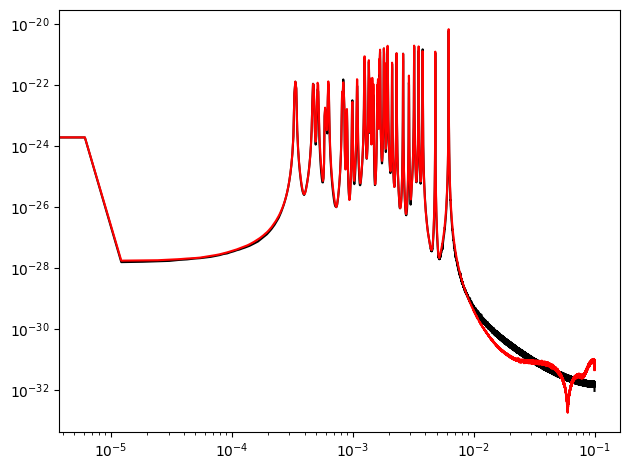

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
orbit_file_path = r"C:\Users\86130\Desktop\orbits.h5"
days=365
def create_short_test_data(obs_data,days=days):
    samples_per_dat=int(24*3600/obs_data['obs_dt'])
    num_points=days*samples_per_dat
    short_obs_data={
        'obs_time':obs_data['obs_time'][:num_points],
        'obs_frequency':obs_data['obs_frequency'][:num_points],
        'obs_dt':obs_data['obs_dt'],
        'obs_df':obs_data['obs_df']
    }
    return short_obs_data,num_points

def compute_short_tdi(obs_data,days=days):
    short_obs_data,num_points=create_short_test_data(obs_data,days)
    all_binaries_params=get_all_vgb_parameters(vgb_frame)
    computed_X=np.zeros(num_points,dtype=complex)
    for i,binary_params in enumerate(all_binaries_params):
        likelihood =Bayesianlikelihood(binary_params,short_obs_data,orbit_file_path)
        X_seg=likelihood.calculate_TDI()
        computed_X+=X_seg
    computed_X=np.real(computed_X)
    return computed_X,short_obs_data

def extract_actual_short_data(vgb_data,obs_data,days=days):
    samples_per_dat=int(24*3600/obs_data['obs_dt'])
    num_points=days*samples_per_dat
    actual_X=vgb_data['vgb_X'][:num_points]
    return actual_X
computed_X,short_obs_data=compute_short_tdi(obs_data,days)
actual_X=extract_actual_short_data(vgb_data,obs_data,days)

def compute_psd_welch(signal_data,dt,nperseg=None,noverlap=None):

    fs=1/dt
    if nperseg is None:
        nperseg=8192*4

    if noverlap is None:
        noverlap=nperseg//2
    freqs,Pxx=signal.welch(
        signal_data,
        fs=fs,
        window='hann',
        nperseg=nperseg,
        noverlap=noverlap,
        detrend='constant',
        scaling='density',
        average='median',
        )
    return freqs,Pxx


def validate_short_time_segment(obs_data,vgb_data,days=days):
    computed_X,short_obs_data=compute_short_tdi(obs_data,days)
    actual_X=extract_actual_short_data(vgb_data,obs_data,days)

    fs=1/obs_data['obs_dt']
    dt=obs_data['obs_dt']
    f_comp,Pxx_comp=compute_psd_welch(computed_X,dt)
    f_act,Pxx_act=compute_psd_welch(actual_X,dt)


    plt.loglog(f_comp,np.sqrt(Pxx_comp),'black',linewidth=1.5)
    plt.loglog(f_act,np.sqrt(Pxx_act),'red',linewidth=1.5)
    plt.tight_layout()
    plt.show()
    return Pxx_comp,Pxx_act
Pxx_comp,Pxx_act=validate_short_time_segment(obs_data=obs_data,vgb_data=vgb_data,days=days)